![image](./images/pandas.png)

Pandas est le package de prédilection pour traiter des données structurées.

Pandas est basé sur 2 structures extrêmement liées les Series et le DataFrame.

Ces deux structures permettent de traiter des données sous forme de tableaux indexés.

Les classes de Pandas utilisent des classes de Numpy, il est donc possible d'utiliser les fonctions universelles de Numpy sur les objets Pandas.

In [1]:
# on importe pandas avec :
import pandas as pd
import numpy as np
%matplotlib inline

# Les Series de Pandas

- Les Series sont indexées, c'est leur avantage sur les arrays de NumPy
- On peut utiliser les fonctions `.values` et `.index` pour voir les différentes parties de chaque Series
- On définit une Series par `pd.Series([,], index=['','',])`
- On peut appeler un élément avec `ma_serie['France']`
- On peut aussi faire des conditions :
```python
ma_serie[ma_serie>5000000]
```
```
'France' in ma_serie
```
- Les objets Series peuvent être transformés en dictionnaires en utilisant :
`.to_dict()`

**Exercice :**
    
Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [2]:
serie_pop = pd.Series([70,300,1300,8],index=["France","USA","Chine","Suisse"])

In [3]:
serie_pop

France      70
USA        300
Chine     1300
Suisse       8
dtype: int64

In [4]:
serie_pop["Suisse"]

8

In [5]:
serie_pop.iloc[3]

8

In [6]:
#ne pas utiliser :
#serie_pop[3]

In [7]:
# extraire les pays avec plus de 5M d'hab.
serie_pop[serie_pop>50]

France      70
USA        300
Chine     1300
dtype: int64

# D'autres opérations sur les objets series

- Pour définir le nom de la Series, on utilise `.name`
- Pour définir le titre de la colonne des observations, on utilise `.index.name`

**Exercice :**
    
Définir les noms de l’objet et de la colonne des pays pour la Series précédente


In [8]:
serie_pop.name = "Populations"
serie_pop.index.name = "Pays"
serie_pop

Pays
France      70
USA        300
Chine     1300
Suisse       8
Name: Populations, dtype: int64

# Les données manquantes

Dans pandas, les données manquantes sont identifiés avec les fonctions de Numpy (`np.nan`). On a d'autres fonctions telles que :

In [9]:
pd.isna(pd.Series([2,np.nan,4],index=['a','b','c']))

a    False
b     True
c    False
dtype: bool

In [10]:
pd.notna(pd.Series([2,np.nan,4],index=['a','b','c']))

a     True
b    False
c     True
dtype: bool

In [11]:
pd.Series([2,np.nan,4],index=['a','b','c']).mean()

3.0

# Les dates avec pandas

- Python possède un module datetime qui permet de gérer facilement des dates
- Pandas permet d'appliquer les opérations sur les dates aux Series et aux DataFrame
- Le format es dates Python est `YYYY-MM-DD HH:MM:SS`

- On peut générer des dates avec la fonction `pd.date_range()` avec différente fréquences `freq=`
- On peut utiliser ces dates comme index dans un DataFrame ou dans un objet Series
- On peut changer la fréquence en utilisant `.asfreq()`
- Pour transformer une chaine de caractère en date, on utilise `pd.to_datetime()` avec l’option `dayfirst=True` si on est dans le cas français
-On pourra aussi spécifier un format pour accélérer le processus `%Y%m%d`

**Exercice :**

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui. Afficher le résultat dans un graphique (on utilisera la méthode `.plot()`

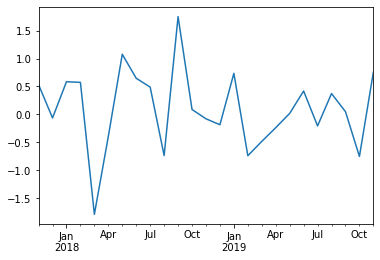

In [12]:
dates = pd.date_range("2017-11-03",pd.datetime.today(),freq="M")

serie_dates = pd.Series(np.random.randn(len(dates)),index=dates)
serie_dates.plot()

# Le DataFrame 

- Les DataFrame sont des objets très souples pouvant être construits de différentes façon
- On peut les construire en récupérant des données copier / coller, où directement sur Internet, ou en entrant les valeurs manuellement


- Les DataFrame se rapprochent des dictionnaires et on peut construire ces objets en utilisant `DataFrame(dico)`
- De nombreux détails sur la création des DataFrame se trouve sur ce site :

<http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html>


# Construction de DataFrame

On peut simplement construire un DataFrame avec le classe pd.DataFrame() à partir de différentes structures :

In [13]:
frame1=pd.DataFrame(np.random.randn(10).reshape(5,2),
             index=["obs_"+str(i) for i in range(5)],
             columns=["col_"+str(i) for i in range(2)])
frame1

,col_0,col_1
obs_0,1.012821,-0.094583
obs_1,-0.058863,-0.761978
obs_2,-2.328167,0.999037
obs_3,0.984147,2.449559
obs_4,-0.798088,-0.624933


# Opérations sur les DataFrame

On peut afficher le nom des colonnes :

In [14]:
print(frame1.columns)

Index(['col_0', 'col_1'], dtype='object')


On peut accéder à une colonne avec :
- `frame1.col_0` : attention au cas de nom de colonnes avec des espaces...
- `frame1['col_0']`

On peut accéder à une cellule avec :
- `frame1.loc['obs1','col_0']` : on utilise les index et le nom des colonnes
- `frame1.iloc[1,0]` : on utilise les positions dans le DataFrame


# Options de visualisation et de résumé

Pour afficher les 3 premières lignes, on peut utiliser :


In [15]:
frame1.head(3)

,col_0,col_1
obs_0,1.012821,-0.094583
obs_1,-0.058863,-0.761978
obs_2,-2.328167,0.999037


Pour afficher un résumé du DF :

In [16]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, obs_0 to obs_4
Data columns (total 2 columns):
col_0    5 non-null float64
col_1    5 non-null float64
dtypes: float64(2)
memory usage: 120.0+ bytes


# Importer des données externes

Pandas est l'outil le plus efficace pour importer des données externes, il prend en charge de nombreux formats dont csv, Excel, SQL, SAS...


## Importation de données avec Pandas

Quel que soit le type de fichier, Pandas possède une fonction :
```python
frame=pd.read_...('chemin_du_fichier/nom_du_fichier',...)
```
Pour écrire un DataFrame dans un fichier, on utilise :
```python
frame.to_...('chemin_du_fichier/nom_du_fichier',...)
```

**Exercice :**
    
Importer un fichier `.csv` avec `pd.read_csv()`. On utilisera le fichier "./data/airbnb.csv"

In [17]:
airbnb = pd.read_csv("https://www.stat4decision.com/airbnb.csv")

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
airbnb.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20190507030954,2019-05-07,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,...,f,f,flexible,f,f,1,1,0,0,0.28
1,5396,https://www.airbnb.com/rooms/5396,20190507030954,2019-05-08,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.44
2,7397,https://www.airbnb.com/rooms/7397,20190507030954,2019-05-07,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,2.47


In [19]:
airbnb['price']

0         $75.00
1        $115.00
2        $115.00
3         $90.00
4         $75.00
          ...   
59121     $50.00
59122    $350.00
59123     $80.00
59124     $32.00
59125     $60.00
Name: price, Length: 59126, dtype: object

In [20]:
airbnb.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59126 entries, 0 to 59125
Data columns (total 106 columns):
id                                              int64
listing_url                                     object
scrape_id                                       int64
last_scraped                                    object
name                                            object
summary                                         object
space                                           object
description                                     object
experiences_offered                             object
neighborhood_overview                           object
notes                                           object
transit                                         object
access                                          object
interaction                                     object
house_rules                                     object
thumbnail_url                                   float64
medium_url 

In [21]:
airbnb["jurisdiction_names"].value_counts()

{PARIS}                     57935
{Paris}                       121
{"BOULOGNE BILLANCOURT"}       62
{"ISSY LES MOULINEAUX"}        46
{"NEUILLY SUR SEINE"}          42
{"LEVALLOIS PERRET"}           32
{GENTILLY}                     31
{"SAINT OUEN"}                 23
{"ASNIERES SUR SEINE"}         22
{VINCENNES}                    18
{CLICHY}                       17
{"CHARENTON LE PONT"}          16
{AUBERVILLIERS}                13
{"IVRY SUR SEINE"}             13
{PANTIN}                       12
{BAGNOLET}                     11
{"SAINT MAURICE"}              10
{"LE KREMLIN BICETRE"}          9
{VANVES}                        8
{"NOGENT SUR MARNE"}            3
{"SOULAC SUR MER"}              2
{SURESNES}                      2
{MONTREUIL}                     2
{"BRAS PANON"}                  2
{"SAINT JEAN LE BLANC"}         1
{"FONTENAY SOUS BOIS"}          1
{"PARIS LHOPITAL"}              1
{"CHAMONIX MONT BLANC"}         1
{"PORT DE BOUC"}                1
Name: jurisdic

# D'autres types de données

## JSON
Les objets JSON ressemblent à des dictionnaires.

On utilise le module `json` puis la fonction `json.loads()` pour transformer une entrée JSON en objet json

## HTML
On utilise `pd.read_html(url)`. Cet fonction est basée sur les packages `beautifulsoup` et `html5lib`

Cette fonction renvoie une liste de DataFrame qui représentent tous les DataFrame de la page. On ira ensuite chercher l'élément qui nous intéresse avec `frame_list[0]`

**Exercice :**
    
Importez un tableau en html depuis la page <http://www.fdic.gov/bank/individual/failed/banklist.html>

In [22]:
bank = pd.read_html("http://www.fdic.gov/bank/individual/failed/banklist.html")

In [23]:
type(bank)

list

In [24]:
bank[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019","November 7, 2019"
1,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019","November 12, 2019"
2,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019","November 7, 2019"
3,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019","August 22, 2019"
4,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017","July 24, 2019"
...,...,...,...,...,...,...,...
554,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001","August 19, 2014"
555,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001","November 18, 2002"
556,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001","February 18, 2003"
557,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000","March 17, 2005"


# Importer depuis Excel

On a deux approches pour Excel :
- On peut utiliser `pd.read_excel()`
- On peut utiliser la classe `pd.ExcelFile()`

Dans ce cas, on utilise :
```python
xlsfile=pd.ExcelFile('fichier.xlsx')
xlsfile.parse('Sheet1')
```

**Exercice :** 
    
Importez un fichier Excel avec les deux approches, on utilisera : `credit2.xlsx` et `ville.xls`

In [25]:
credit2 = pd.read_excel("./data/credit2.xlsx")

In [26]:
credit2.head()

,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner,Customer_ID
0,40,F,S,11,6,37,56,37073,F,5409
1,47,M,M,13,13,30,56,50721,F,5477
2,35,F,U,1,9,33,57,43578,T,5507
3,45,M,U,15,7,30,62,69553,F,8
4,13,F,S,0,7,27,64,37502,T,158


# Importer des données SQL

Pandas possède une fonction `read_sql()` qui permet d’importer directement des bases de données ou des queries dans des DataFrame

Il faut tout de même un connecteur pour accéder aux bases de données

Pour mettre en place ce connecteur, on utlise le package SQLAlchemy.

Suivant le type de base de données, on utilisera différents codes mais la structure du code est toujours la même

In [27]:
# on importe l'outil de connexion
from sqlalchemy import create_engine

On crée une connexion
```python
connexion=create_engine("sqlite:///___.sqlite")
```

On utlise une des fonctions de Pandas pour charger les données
```python
requete="""select ... from ..."""
frame_sql=pd.read_sql_query(requete,connexion)
```

**Exercices :**
    
Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 

In [28]:
connexion=create_engine("sqlite:///./data/salaries.sqlite")

In [29]:
connexion.table_names()

['Salaries']

In [30]:
requete="""select * from Salaries"""
frame_salaries=pd.read_sql_query(requete,connexion)

In [31]:
frame_salaries

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


# Importer des données SAS

On peut utiliser `pd.read_sas`

**Exercice :**
Importez le fichier SAS se trouvant dans le répertoire `./data/`

In [32]:
ecoles = pd.read_sas("./data/bce_uai.sas7bdat",encoding = "iso-8859-1")

In [33]:
ecoles.shape

(67441, 15)

In [34]:
ecoles.head()

,CONTRAT_ETABLISSEMENT,CATEGORIE_JURIDIQUE,ETAT_ETABLISSEMENT,MINISTERE_TUTELLE,NUMERO_UAI,SIGLE_UAI,SECTEUR_PUBLIC_PRIVE,NATURE_UAI,COMMUNE,DATE_OUVERTURE,DATE_FERMETURE,DENOMINATION_PRINCIPALE_UAI,PATRONYME_UAI,NIVEAU_UAI,SECTEUR_CONTRAT
0,99,131,1,06,0010670Y,E.P.PU,PU,151,01001,1966-09-30,NaT,ECOLE PRIMAIRE PUBLIQUE,NaN,1,01
1,30,999,1,06,0010093W,E.P.PR,PR,151,01004,1971-03-12,NaT,ECOLE PRIMAIRE PRIVEE,STE MARIE,1,03
2,99,131,1,06,0011207G,E.E.PU,PU,151,01004,1984-09-01,NaT,ECOLE ELEMENTAIRE PUBLIQUE,JULES FERRY,1,01
3,99,200,1,06,0010001W,LP LYC METIER,PU,320,01004,1965-05-01,NaT,LP LYCEE DES METIERS,ALEXANDRE BERARD,1,01
4,99,131,1,06,0010445D,E.M.PU,PU,101,01004,1966-10-07,NaT,ECOLE MATERNELLE PUBLIQUE,JEAN JAURES,1,01


In [35]:
ecoles["SECTEUR_PUBLIC_PRIVE"]=="PR"

0        False
1         True
2        False
3        False
4        False
         ...  
67436     True
67437     True
67438     True
67439    False
67440     True
Name: SECTEUR_PUBLIC_PRIVE, Length: 67441, dtype: bool

In [36]:
# on filtre et on ne garde que le public
ecoles[ecoles["SECTEUR_PUBLIC_PRIVE"]=="PU"]

,CONTRAT_ETABLISSEMENT,CATEGORIE_JURIDIQUE,ETAT_ETABLISSEMENT,MINISTERE_TUTELLE,NUMERO_UAI,SIGLE_UAI,SECTEUR_PUBLIC_PRIVE,NATURE_UAI,COMMUNE,DATE_OUVERTURE,DATE_FERMETURE,DENOMINATION_PRINCIPALE_UAI,PATRONYME_UAI,NIVEAU_UAI,SECTEUR_CONTRAT
0,99,131,1,06,0010670Y,E.P.PU,PU,151,01001,1966-09-30,NaT,ECOLE PRIMAIRE PUBLIQUE,NaN,1,01
2,99,131,1,06,0011207G,E.E.PU,PU,151,01004,1984-09-01,NaT,ECOLE ELEMENTAIRE PUBLIQUE,JULES FERRY,1,01
3,99,200,1,06,0010001W,LP LYC METIER,PU,320,01004,1965-05-01,NaT,LP LYCEE DES METIERS,ALEXANDRE BERARD,1,01
4,99,131,1,06,0010445D,E.M.PU,PU,101,01004,1966-10-07,NaT,ECOLE MATERNELLE PUBLIQUE,JEAN JAURES,1,01
5,99,131,1,06,0011265V,E.E.PU,PU,151,01004,1989-09-01,NaT,ECOLE ELEMENTAIRE PUBLIQUE,JEAN JAURES,1,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67395,99,999,1,01,4040069E,LFE,PU,304,99404,2015-06-16,NaT,LYCEE FRANCAIS,NaN,1,01
67410,99,999,1,01,4150002X,LFE,PU,304,99415,1983-01-01,NaT,LYCEE FRANCAIS,"FR ARGENTIN J.MERMOZ(M,E,C,L)",1,01
67431,99,999,1,01,4210003R,E.P.F.,PU,154,99421,2006-09-01,NaT,ECOLE PRIMAIRE FRANCAISE,"COLLEGE JULES VERNE ( M, E)",1,01
67434,99,999,1,01,4240001X,LFE,PU,304,99424,1976-04-05,NaT,LYCEE FRANCAIS,"COLEGIO FRANCIA (M,E,C,L)",1,01


In [37]:
ecoles[ecoles["SECTEUR_PUBLIC_PRIVE"]=="PU"] ["PATRONYME_UAI"].value_counts()

JULES FERRY        499
JACQUES PREVERT    369
JEAN MOULIN        362
JEAN JAURES        319
VICTOR HUGO        286
                  ... 
JACQUES TOUTAIN      1
MIGNET               1
KAWENI 2             1
LE DIAMANT           1
LA TOUR BLANCHE      1
Name: PATRONYME_UAI, Length: 23081, dtype: int64

# Les tris avec Pandas 

Pour effectuer des tris, on utilise :
- `.sort_index()` pour le tri des index
- `.sort_values()` pour le tri des données
- `.rank()` affiche le rang des observations

Il peut y avoir plusieurs tris dans la même opération. Dans ce cas, on utilise des listes de colonnes :
```python
frame.sort_values(["col_1","col_2"])
```

**Exercice :** 
    
Triez les données sur les salaires en se basant sur le BasePay et le JobTitle

In [38]:
frame_salaries.sort_values(["JobTitle","BasePay"],ascending=[True,False])

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
20765,20766,NAPOLEON VIRAY,ACCOUNT CLERK,60838.2,0,0,,60838.20,60838.20,2011,,San Francisco,
21638,21639,SUSAN CHANG,ACCOUNT CLERK,51306.3,5406.34,1814.58,,58527.20,58527.20,2011,,San Francisco,
22972,22973,OLIVIA BOUDREAUX,ACCOUNT CLERK,49778.2,3811.68,1084.76,,54674.59,54674.59,2011,,San Francisco,
24573,24574,GLADYS PALACIOS,ACCOUNT CLERK,49777.9,0,624,,50401.92,50401.92,2011,,San Francisco,
24574,24575,JOCELYN VERGEL DE DIOS,ACCOUNT CLERK,49777.9,0,624.01,,50401.87,50401.87,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58842,58843,Mario Yedidia,Youth Comm Advisor,57544.7,0,0,28229.7,57544.73,85774.39,2012,,San Francisco,
98074,98075,Phimy Truong,Youth Comm Advisor,52433.9,0,0,25297.5,52433.88,77731.38,2013,,San Francisco,
138458,138459,Phimy Truong,Youth Comm Advisor,32417.4,0,4048.49,15545.3,36465.91,52011.19,2014,,San Francisco,PT
103333,103334,Mario R Yedidia,Youth Comm Advisor,13915.8,0,5296.91,5744.53,19212.71,24957.24,2013,,San Francisco,


In [39]:
frame_salaries.describe()

,Id,TotalPay,TotalPayBenefits,Year
count,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,74768.321972,93692.554811,2012.522643
std,42912.857795,50517.005274,62793.533483,1.117538
min,1.000000,-618.130000,-618.130000,2011.000000
25%,37164.250000,36168.995000,44065.650000,2012.000000
50%,74327.500000,71426.610000,92404.090000,2013.000000
75%,111490.750000,105839.135000,132876.450000,2014.000000
max,148654.000000,567595.430000,567595.430000,2014.000000


# Les statistiques simples

Les Dataframe possèdent de nombreuses méthodes pour calculer des statistiques simples :
- `.sum(axis=0)` permet de faire une somme par colonne
- `.sum(axis=1)` permet de faire une somme par ligne
- `.min()` et `.max()` donnent le minimum par colonne
- `.idxmin()` et `.idxmax()` donnent l’index du minimum et du maximum
- `.describe()` affiche un tableau de statistiques descriptives par colonne
- `.corr()` pour calculer la corrélation entre les colonnes

**Exercice :**
    
Obtenir les différentes statistiques descriptives pour les données AirBnB.

On peut s'intéresser à la colonne `Price` (attention des prétraitements sont nécessaires)


In [40]:
airbnb["price2"] = pd.to_numeric(airbnb["price"].str.replace("$","").str.replace(",",""))

In [41]:
airbnb["price2"].mean()

116.32598180157629

In [42]:
airbnb["price2"].describe()

count    59126.000000
mean       116.325982
std        167.669754
min          0.000000
25%         59.000000
50%         80.000000
75%        120.000000
max       9379.000000
Name: price2, dtype: float64

In [43]:
airbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'price2'],
      dtype='object', length=107)

In [44]:
airbnb.iloc[airbnb["price2"].idxmax()]

id                                                                           7225849
listing_url                                     https://www.airbnb.com/rooms/7225849
scrape_id                                                             20190507030954
last_scraped                                                              2019-05-07
name                                                  Artistic apartment, Montmartre
                                                                ...                 
calculated_host_listings_count_entire_homes                                        1
calculated_host_listings_count_private_rooms                                       0
calculated_host_listings_count_shared_rooms                                        0
reviews_per_month                                                               0.51
price2                                                                          9379
Name: 12976, Length: 107, dtype: object

In [45]:
airbnb.sort_values("price2")

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price2
33559,19974916,https://www.airbnb.com/rooms/19974916,20190507030954,2019-05-07,Petit nid - village de Montmartre,À deux pas de la Basilique du Sacré Cœur. Dans...,À deux pas du Sacré Cœur dans une charmante ru...,À deux pas de la Basilique du Sacré Cœur. Dans...,none,Montmartre!,...,f,strict_14_with_grace_period,f,f,1,1,0,0,2.58,0.0
34341,20291987,https://www.airbnb.com/rooms/20291987,20190507030954,2019-05-08,Romantic Garden view near Champs-Elysées,"Very private, on an inner romantic garden, rem...",The studio offers a well-equipped space and is...,"Very private, on an inner romantic garden, rem...",none,"Quiet neighborhood, small supermarket across t...",...,f,strict_14_with_grace_period,f,f,5,5,0,0,1.42,0.0
46598,27546389,https://www.airbnb.com/rooms/27546389,20190507030954,2019-05-07,Appartement familiale dans le 12ème,NaN,Appartement familiale comprenant trois chambre...,Appartement familiale comprenant trois chambre...,none,NaN,...,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN,0.0
34370,20313940,https://www.airbnb.com/rooms/20313940,20190507030954,2019-05-07,Charming loft in the Upper Marais,Charming artist's loft on the top floor of an ...,The apartment is a single open space with cath...,Charming artist's loft on the top floor of an ...,none,"The Upper Marais, where the apartment is locat...",...,f,moderate,f,f,1,1,0,0,1.29,0.0
34191,20219162,https://www.airbnb.com/rooms/20219162,20190507030954,2019-05-07,Nice & cosy parisian flat,Hello :) Welcome to the best area of Paris ! T...,NaN,Hello :) Welcome to the best area of Paris ! T...,none,NaN,...,f,moderate,f,f,1,1,0,0,0.12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10073,6088687,https://www.airbnb.com/rooms/6088687,20190507030954,2019-05-07,Lovely Duplex 30m2 - Le Marais,The apartment is a charming studio organized i...,Hello! I entrust to you my charming duplex apa...,The apartment is a charming studio organized i...,none,"Great neighbourhood, very central in the 3rd d...",...,f,strict_14_with_grace_period,f,f,1,1,0,0,0.78,8500.0
42726,25448670,https://www.airbnb.com/rooms/25448670,20190507030954,2019-05-08,cosytiti Paris 15,cosytiti,cosytiti,cosytiti cosytiti facile,none,NaN,...,f,flexible,f,f,1,1,0,0,0.18,8576.0
14823,8093890,https://www.airbnb.com/rooms/8093890,20190507030954,2019-05-08,EIFFEL TOWER TROCADERO 2 BEDROOM,Wonderful parisian flat close (3 min walk) to ...,"The room is situated in a very nice Parisian ""...",Wonderful parisian flat close (3 min walk) to ...,none,"Close to Trocadero, arc de Triomphe, the area ...",...,f,strict_14_with_grace_period,f,f,1,1,0,0,0.21,8721.0
46718,27608896,https://www.airbnb.com/rooms/27608896,20190507030954,2019-05-07,Petit studio parisien,Petit studio tranquille dans le 14e Reposant e...,NaN,Petit studio tranquille dans le 14e Reposant e...,none,NaN,...,f,flexible,f,f,1,0,1,0,0.11,8932.0


# Le traitement des données manquantes

- Les données manquantes sont identifiées par `NaN`


- `.dropna()` permet de retirer les données manquantes dans un objet Series et l’ensemble d’une ligne dans le cas d’un DataFrame
- Pour éliminer par colonne, on utilise `.dropna(axis=1)`
- Remplacer toutes les données manquantes `.fillna(valeur)`


# Les jointures avec Pandas

On veut joindre des jeux de données en utilisant des clés (variables communes)

- `pd.merge()` permet de joindre deux DataFrame, on utilise comme options `on='key'`

- On peut utiliser comme option `how=`, on peut avoir :
    - `left` dans ce cas, on garde le jeu de données à gauche et pour les données de droite des valeurs manquantes sont ajoutées.
    - `outer`, on garde toutes les valeurs des deux jeux de données
    - ...

- On peut avoir plusieurs clés et faire une jointure sur les deux clés `on=['key1','key2']`

Pour plus de détails : <http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html>


**Exercice :**
    
Joindre deux dataframes (credit1 et credit2).


In [46]:
credit1 = pd.read_table("./data/credit1.txt")

In [47]:
credit_global = pd.merge(credit1,credit2,on="Customer_ID")

In [48]:
credit_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 31 columns):
Months_as_a_Customer               2000 non-null int64
Number_of_Products                 2000 non-null int64
RFM_Score                          2000 non-null int64
Average_Balance_Feed_Index         2000 non-null int64
Number_of_Transactions             2000 non-null int64
Personal_Debt_to_Equity_Ratio      2000 non-null int64
Months_Current_Account             2000 non-null int64
Number_of_Loan_Accounts            2000 non-null int64
Customer_ID                        2000 non-null int64
Has_Bad_Payment_Record             2000 non-null int64
Members_Within_Household           2000 non-null int64
Number_of_Call_Center_Contacts     2000 non-null int64
Weeks_Since_Last_Offer             2000 non-null int64
Accepted_Personal_Loan             2000 non-null object
Accepted_Retention                 2000 non-null object
Accepted_Home_Equity_Loan          2000 non-null object
Accepted_C

# Gestion des duplications

- On utilise `.duplicated()` ou `.drop_duplicates()` dans le cas où on désire effacer les lignes se répétant


- On peut se concentrer sur une seule variables en entrant directement le nom de la variable. Dans ce cas, c’est la première apparition qui compte. Si on veut prendre la dernière apparition, on utilise l’option `keep="last"`. On pourra avoir :
```python
frame1.drop_duplicates(["col_0","col_1"],keep="last")
```

# Discrétisation

Pour discrétiser, on utilise la fonction `pd.cut()`, on va définir une liste de points pour discrétiser et on entre cette liste comme second paramètre de la fonction.

Une fois discrétisé, on peut afficher les modalités obtenues en utilisant `.categories`

On peut aussi compter les occurrence en utilisant `pd.value_counts()`

Il est aussi possible d’entrer le nombre de segments comme second paramètre

On utilisera aussi `qcut()`

**Exercice :**
    
Créez une variable dans le dataframe AirBnB pour obtenir des niveaux de prix.


In [49]:
airbnb["price_disc"]=pd.cut(airbnb["price2"],5)
airbnb["price_disc"].value_counts()

(-9.379, 1875.8]    59078
(1875.8, 3751.6]       36
(7503.2, 9379.0]        6
(3751.6, 5627.4]        6
(5627.4, 7503.2]        0
Name: price_disc, dtype: int64

In [50]:
airbnb["price_disc2"]=pd.qcut(airbnb["price2"],4)
airbnb["price_disc2"].value_counts()

(59.0, 80.0]       15593
(-0.001, 59.0]     14842
(80.0, 120.0]      14573
(120.0, 9379.0]    14118
Name: price_disc2, dtype: int64

In [51]:
airbnb[airbnb["price2"]>1000]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price2,price_disc,price_disc2
73,36868,https://www.airbnb.com/rooms/36868,20190507030954,2019-05-08,Great family size apt near park !,Three bedroom in quiet street but lively neigh...,Hi! I'm offering my own Paris apartment for se...,Three bedroom in quiet street but lively neigh...,none,"wonderful neighborhood : quite yet lively, two...",...,f,f,1,1,0,0,0.27,1800.0,"(-9.379, 1875.8]","(120.0, 9379.0]"
1021,571017,https://www.airbnb.com/rooms/571017,20190507030954,2019-05-08,The ultimate luxury in Paris,NaN,Villa D’Alésia is a gem in the city of (Websit...,Villa D’Alésia is a gem in the city of (Websit...,none,NaN,...,f,f,2,2,0,0,0.17,1206.0,"(-9.379, 1875.8]","(120.0, 9379.0]"
1447,732458,https://www.airbnb.com/rooms/732458,20190507030954,2019-05-07,Paris Montmartre Sacré Coeur House with big Ga...,"In the heart of Montmartre at 150 m from ""Sacr...",VERY IMPORTANT : THE RENTAL TERMS ARE VALID F...,"In the heart of Montmartre at 150 m from ""Sacr...",none,NaN,...,f,f,1,1,0,0,0.20,1300.0,"(-9.379, 1875.8]","(120.0, 9379.0]"
1877,908350,https://www.airbnb.com/rooms/908350,20190507030954,2019-05-08,Parisian Charm & Gourmet Delight,NaN,"A charming Parisian home with a library, histo...","A charming Parisian home with a library, histo...",none,NaN,...,f,f,1,1,0,0,0.55,1500.0,"(-9.379, 1875.8]","(120.0, 9379.0]"
4221,2344562,https://www.airbnb.com/rooms/2344562,20190507030954,2019-05-08,1 room Apartment,"220 sq ft, 3rd floor no lift, on a quiet stree...","near Place d'italie, big shopping Mall Italie 2","220 sq ft, 3rd floor no lift, on a quiet stree...",none,quiet residential neighbourghood,...,f,f,2,2,0,0,0.04,5000.0,"(3751.6, 5627.4]","(120.0, 9379.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57980,34101807,https://www.airbnb.com/rooms/34101807,20190507030954,2019-05-07,165M2 PREMIUM LUXURY 3BR/3BATH-CHAMPS ELYSEES,Families and groups will love this stunning ap...,"APARTMENT CAN BE BOOKED AS SHOWROOM, PLEASE CO...",Families and groups will love this stunning ap...,none,NaN,...,f,f,282,261,21,0,NaN,1350.0,"(-9.379, 1875.8]","(120.0, 9379.0]"
58157,34165773,https://www.airbnb.com/rooms/34165773,20190507030954,2019-05-07,RD1 BLUE NIGHT APPARTEMENT MARAIS,Le Blue Nights Apartments - Sébastopol est sit...,Le Blue Nights Apartments - Sébastopol est sit...,Le Blue Nights Apartments - Sébastopol est sit...,none,Très bon emplacement ! Les clients ont adoré s...,...,f,f,18,18,0,0,NaN,2000.0,"(1875.8, 3751.6]","(120.0, 9379.0]"
58752,34359005,https://www.airbnb.com/rooms/34359005,20190507030954,2019-05-07,Modern and luminous flat in the heart of Paris,"Located in the heart of the 9th district, this...","Located in the heart of the 9th district, this...","Located in the heart of the 9th district, this...",none,The apartment is located in the 9th arrondisse...,...,f,f,18,18,0,0,NaN,8288.0,"(7503.2, 9379.0]","(120.0, 9379.0]"
58797,34377495,https://www.airbnb.com/rooms/34377495,20190507030954,2019-05-08,Superbe Apartment 2 bedrooms,Superbe and Spacious 2 bed apartment near Port...,Spacious and comfortable 2 bed apartment with ...,Superbe and Spacious 2 bed apartment near Port...,none,NaN,...,f,f,7,7,0,0,NaN,1899.0,"(1875.8, 3751.6]","(120.0, 9379.0]"


# Les tableaux croisés avec Pandas

Les DataFrame possèdent des méthodes pour générer des tableaux croisés, notamment :
```python
frame1.pivot_table()
```
Cette méthode permet de gérer de nombreux cas avec des fonctions standards et sur mesure.

# L'utilisation de GroupBy sur des DataFrame

- `.groupby` permet de rassembler des observations en fonction d’une variable dite de groupe


- Par exemple, `frame.groupby('X').mean()` donnera les moyennes par groupes de `X`


- On peut aussi utiliser `.size()` pour connaître la taille des groupes et utiliser d’autres fonctions (`.sum()`)


- On peut effectuer de nombreuses opérations de traitement avec le groupby


**Exercice :**
    
- Données sur les airbnb


- On utilise le `groupby()` pour rassembler les types d’appartement


- Et on calcule des statistiques pour chaque type


On peut utiliser la méthode `.agg()` avec par exemple `'mean'` comme paramètre

On utilise aussi fréquemment la méthode `.apply()` combinée à une fonction lambda

In [52]:
airbnb["room_type"].value_counts()

Entire home/apt    51132
Private room        7527
Shared room          467
Name: room_type, dtype: int64

Essayez d'utiliser une fonction lambda sur le groupby

In [53]:
airbnb_group_room = airbnb.groupby("room_type")

In [54]:
airbnb_group_room["price2"].mean()

room_type
Entire home/apt    117.270613
Private room       113.091139
Shared room         65.036403
Name: price2, dtype: float64

In [55]:
def etendue(x):
    return x.max()-x.min()

In [56]:
etendue(airbnb_group_room["review_scores_rating"])

room_type
Entire home/apt    80.0
Private room       80.0
Shared room        80.0
Name: review_scores_rating, dtype: float64

In [57]:
airbnb_group_room["review_scores_rating"].agg(["mean","median","std","count",etendue,
                                               lambda x : x.max()-x.min(),"min","max"])

,mean,median,std,count,etendue,<lambda_0>,min,max
room_type,,,,,,,,
Entire home/apt,92.884920,95.0,8.308599,39338,80.0,80.0,20.0,100.0
Private room,93.173706,95.0,8.453961,5469,80.0,80.0,20.0,100.0
Shared room,90.774096,93.0,11.230092,332,80.0,80.0,20.0,100.0


In [58]:
airbnb["review_scores_rating"].agg(["mean","median","std","count",etendue,"min","max"])

mean          92.904384
median        95.000000
std            8.353803
count      45139.000000
etendue       80.000000
min           20.000000
max          100.000000
Name: review_scores_rating, dtype: float64

In [59]:
airbnb_group_room["review_scores_rating"].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,39338.0,92.884920,8.308599,20.0,90.00,95.0,99.0,100.0
Private room,5469.0,93.173706,8.453961,20.0,90.00,95.0,100.0,100.0
Shared room,332.0,90.774096,11.230092,20.0,87.75,93.0,97.0,100.0


Travail sur les dates et les chaînes de caractères

In [60]:
ecoles["JOUR_OUVERTURE"]=ecoles["DATE_OUVERTURE"].dt.day_name()

In [61]:
ecoles["primaires"]= ecoles["DENOMINATION_PRINCIPALE_UAI"].str.find("PRIMAIRE")>0

In [62]:
ecoles["primaires"].value_counts(normalize=True)

False    0.715648
True     0.284352
Name: primaires, dtype: float64

In [63]:
ecoles["DENOMINATION_PRINCIPALE_UAI"]=ecoles["DENOMINATION_PRINCIPALE_UAI"].str.lower()

Exercice : créer une colonne avec la différence de dates entre deux ocurr_score par patient

In [65]:
base = pd.read_excel("./data/Base.xlsx")

In [66]:
base.head()

,patient_num,encounter_num,score,date,occurr_score,subscore,lat
0,100145101882890000,670270877573828992,2.0,2017-02-02 12:39:00,1,1.0,R
1,100145101882890000,870270877573828992,1.0,2018-02-02 10:37:00,2,2.0,L
2,100145101882890000,970270877573828992,3.0,2018-09-02 12:31:00,3,1.0,R
3,200145101882889984,240270877573828992,1.0,2011-02-02 12:39:00,1,1.0,L
4,200145101882889984,250270877573828992,1.0,2013-02-03 12:39:00,2,3.0,R


L'objectif est de travailler par patient sur les dates

In [67]:
base.sort_values(["patient_num","occurr_score"],inplace=True)

In [68]:
base.head()

,patient_num,encounter_num,score,date,occurr_score,subscore,lat
0,100145101882890000,670270877573828992,2.0,2017-02-02 12:39:00,1,1.0,R
1,100145101882890000,870270877573828992,1.0,2018-02-02 10:37:00,2,2.0,L
2,100145101882890000,970270877573828992,3.0,2018-09-02 12:31:00,3,1.0,R
3,200145101882889984,240270877573828992,1.0,2011-02-02 12:39:00,1,1.0,L
4,200145101882889984,250270877573828992,1.0,2013-02-03 12:39:00,2,3.0,R


In [69]:
# on croise les no de patients et occur score
frame_dates = base.pivot_table(index="patient_num",columns="occurr_score",values="date",aggfunc="max")

In [70]:
frame_dates["new_col"]=frame_dates[1]-frame_dates[2]

In [71]:
# on construit une colonne décalée sur toutes les données
base["date_next"]=base["date"].shift(1)

In [72]:
base.head()

,patient_num,encounter_num,score,date,occurr_score,subscore,lat,date_next
0,100145101882890000,670270877573828992,2.0,2017-02-02 12:39:00,1,1.0,R,NaT
1,100145101882890000,870270877573828992,1.0,2018-02-02 10:37:00,2,2.0,L,2017-02-02 12:39:00
2,100145101882890000,970270877573828992,3.0,2018-09-02 12:31:00,3,1.0,R,2018-02-02 10:37:00
3,200145101882889984,240270877573828992,1.0,2011-02-02 12:39:00,1,1.0,L,2018-09-02 12:31:00
4,200145101882889984,250270877573828992,1.0,2013-02-03 12:39:00,2,3.0,R,2011-02-02 12:39:00


In [73]:
# on peut construire une colonne décalée par patient
base["new_date"]=base.groupby("patient_num")["date"].shift(1)

In [74]:
# on fait la différence entre la consultation et la suivante
base["diff_next"]= base["new_date"]-base["date"]

In [75]:
# on calcule la plus grande différence entre deux consultation par patient et par lat
base.groupby(["patient_num","lat"])["date"].apply(lambda x : x.max()-x.min())

patient_num         lat
100145101882890000  L        0 days 00:00:00
                    R      576 days 23:52:00
200145101882889984  L     2924 days 00:00:00
                    R     2191 days 00:00:00
300145101882889984  R     2925 days 00:00:00
400145101882889984  L      731 days 00:00:00
                    R     1828 days 00:00:00
500145101882889984  R     6577 days 00:00:00
600145101882889984  L      731 days 00:00:00
                    R        0 days 00:00:00
700145101882889984  R        0 days 00:00:00
800145101882889984  L        0 days 00:00:00
                    R     6581 days 00:00:00
900145101882889984  L     3654 days 00:00:00
Name: date, dtype: timedelta64[ns]